In [1]:
import sys
sys.path.append("../")

%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy.spatial.transform import Rotation as R
import utils.transformations as tf

In [2]:
poses_colmap = np.load("colmap2.npy")
poses_tum = np.load("tum.npy")

In [3]:
q_colmap = np.array([R.from_matrix(poses_colmap[i, :3,:3]).as_quat() for i in range(len(poses_colmap))])
q_tum = np.array([R.from_matrix(poses_tum[i, :3,:3]).as_quat() for i in range(len(poses_tum))])

In [4]:
t_colmap = poses_colmap[:,:-1,-1]
t_tum = poses_tum[:,:-1,-1]

### Visualise camera poses - 2D

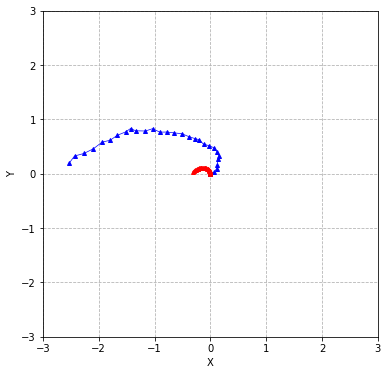

In [6]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt

fr_id = 29
fig = plt.figure(figsize=(6, 6))
ax0 = plt.subplot(111)
ax0.set_xlim((-3, 3))            
ax0.set_ylim((-3, 3))
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.grid(ls='--', color='0.7')

tvec_col = t_colmap
tvec_tum = t_tum

title = ax0.set_title('')
traj_line_col, = ax0.plot([], [], c='blue', ls='-', marker='^', linewidth=0.7, markersize=4)
traj_line_tum, = ax0.plot([], [], c='red', ls='-', marker='^', linewidth=0.7, markersize=4)
traj_line_col.set_data(tvec_col[:fr_id + 1,0], tvec_col[:fr_id + 1, 1])
traj_line_tum.set_data(tvec_tum[:fr_id + 1,0], tvec_tum[:fr_id + 1, 1])

In [7]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    traj_line_col.set_data(tvec_col[:fr_id + 1,0], tvec_col[:fr_id + 1, 1])
    traj_line_tum.set_data(tvec_tum[:fr_id + 1,0], tvec_tum[:fr_id + 1, 1])
    title.set_text('Frame number {0:4d}'.format(fr_id))
    return (traj_line_col,traj_line_tum,)

anim = animation.FuncAnimation(fig, drawframe, frames=30, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# anim.save('plot2D.mp4', writer=writer)

### Visualise Camera Trajectory 3D

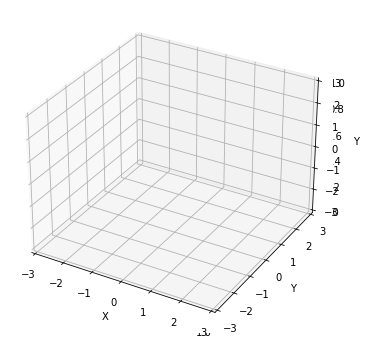

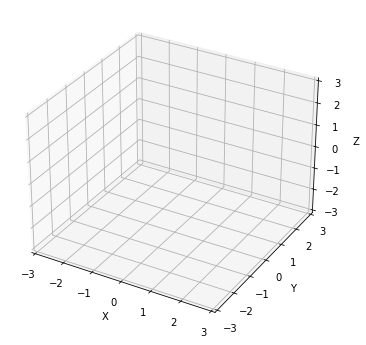

In [8]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from utils.threed_plotter import draw_trajectory_3D

fig1 = plt.figure(figsize=(6, 6))
fig1.add_subplot(111, projection='3d')
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim3d((-3, 3))            
ax1.set_ylim3d((-3, 3))
ax1.set_zlim3d((-3, 3))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Y')
ax1.grid(ls='--', color='0.7')

fig2 = plt.figure(figsize=(6, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlim3d((-3, 3))            
ax2.set_ylim3d((-3, 3))
ax2.set_zlim3d((-3, 3))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.grid(ls='--', color='0.7')

In [9]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    
    ax1.clear()
    
    ax1.set_xlim3d((-3, 3))            
    ax1.set_ylim3d((-3, 3))
    ax1.set_zlim3d((-3, 3))
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.grid(ls='--', color='0.7')
    
    verts_colmap = draw_trajectory_3D(q_colmap[fr_id], t_colmap[fr_id], ax1, ax2)
    verts_tum = draw_trajectory_3D(q_tum[fr_id], t_tum[fr_id], ax1, ax2)

    ax1.add_collection3d(Poly3DCollection(verts_colmap, facecolors='blue',
                                            linewidths=1, edgecolors='blue', alpha=.25))
    ax1.add_collection3d(Poly3DCollection(verts_tum, facecolors='red',
                                            linewidths=1, edgecolors='red', alpha=.25))
    
        
    return

anim = animation.FuncAnimation(fig1, drawframe, frames=30, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('plot3DCamera.mp4', writer=writer)

In [10]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    
    ax2.clear()
    ax2.set_xlim3d((-3, 3))            
    ax2.set_ylim3d((-3, 3))
    ax2.set_zlim3d((-3, 3))
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.grid(ls='--', color='0.7')
    
    
    ax2.plot3D(xs=t_colmap[:fr_id,0],ys=t_colmap[:fr_id,1],zs=t_colmap[:fr_id,2],c='b')
    ax2.plot3D(xs=t_tum[:fr_id,0],ys=t_tum[:fr_id,1],zs=t_tum[:fr_id,2],c='r')

        
    return

anim = animation.FuncAnimation(fig2, drawframe, frames=30, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())

In [11]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
anim.save('plot3D.mp4', writer=writer)

### Calculate relative errors 

In [11]:
def compute_statistics(data_vec):
    stats = dict()
    data_vec = data_vec[1:]
    if len(data_vec) > 0:
        stats['rmse'] = float(
            np.sqrt(np.dot(data_vec, data_vec) / len(data_vec)))
        stats['mean'] = float(np.mean(data_vec))
        stats['median'] = float(np.median(data_vec))
        stats['std'] = float(np.std(data_vec))
        stats['min'] = float(np.min(data_vec))
        stats['max'] = float(np.max(data_vec))
        stats['num_samples'] = int(len(data_vec))
    else:
        stats['rmse'] = 0
        stats['mean'] = 0
        stats['median'] = 0
        stats['std'] = 0
        stats['min'] = 0
        stats['max'] = 0
        stats['num_samples'] = 0

    return stats

In [12]:
def compute_absolute_error(p_es_aligned, q_es_aligned, p_gt, q_gt):
    e_trans_vec = (p_gt-p_es_aligned)
    e_trans = np.sqrt(np.sum(e_trans_vec**2, 1))

    # orientation error
    e_rot = np.zeros((len(e_trans,)))
    e_ypr = np.zeros(np.shape(p_es_aligned))
    for i in range(np.shape(p_es_aligned)[0]):
        R_we = tf.matrix_from_quaternion(q_es_aligned[i, :])
        R_wg = tf.matrix_from_quaternion(q_gt[i, :])
        e_R = np.dot(R_we, np.linalg.inv(R_wg))
        e_ypr[i, :] = tf.euler_from_matrix(e_R, 'rzyx')
        e_rot[i] = np.rad2deg(np.linalg.norm(tf.logmap_so3(e_R[:3, :3])))

    # scale drift
    motion_gt = np.diff(p_gt, 0)
    motion_es = np.diff(p_es_aligned, 0)
    dist_gt = np.sqrt(np.sum(np.multiply(motion_gt, motion_gt), 1))
    dist_es = np.sqrt(np.sum(np.multiply(motion_es, motion_es), 1))
    e_scale_perc = np.abs((np.divide(dist_es, dist_gt)-1.0) * 100)

    return e_trans, e_trans_vec, e_rot, e_ypr, e_scale_perc

In [13]:
e_trans, e_trans_vec, e_rot, e_ypr, e_scale_perc = compute_absolute_error(tvec_tum,q_tum, tvec_col, q_colmap)

<ipython-input-12-781f90176258>:20: RuntimeWarning: divide by zero encountered in true_divide
  e_scale_perc = np.abs((np.divide(dist_es, dist_gt)-1.0) * 100)


In [14]:
stats_trans = compute_statistics(e_trans)
stats_rot = compute_statistics(e_rot)
stats_scale = compute_statistics(e_scale_perc)

In [15]:
stats_trans

{'rmse': 1.1759149923936674,
 'mean': 0.9765468142872239,
 'median': 0.8776438665044793,
 'std': 0.6550819710858127,
 'min': 0.0077528666072671495,
 'max': 2.22528753641428,
 'num_samples': 29}

In [16]:
stats_scale

{'rmse': 84.81045777458802,
 'mean': 84.54317759407732,
 'median': 85.80778136393012,
 'std': 6.727917228346385,
 'min': 50.112986735243226,
 'max': 87.64360230518695,
 'num_samples': 29}

In [17]:
stats_rot

{'rmse': 1.9792248867697504,
 'mean': 1.940877361606079,
 'median': 1.9995308883329184,
 'std': 0.3877192536020838,
 'min': 0.5397924863932362,
 'max': 2.3715559463436087,
 'num_samples': 29}

### Align trajectories

In [18]:
from utils.align_utils import alignTrajectory

In [19]:
scale, rot, trans = alignTrajectory(
                t_tum, t_colmap, q_tum, q_colmap,
                "sim3", -1)

In [20]:
rot

array([[ 0.99997401, -0.00337694,  0.00636965],
       [ 0.00319302,  0.99958392,  0.02866675],
       [-0.00646381, -0.02864566,  0.99956873]])

In [21]:
trans

array([ 0.20023557, -0.11089467,  0.01612732])

In [22]:
t_tum_aligned = np.zeros(np.shape(t_tum))
q_tum_aligned = np.zeros(np.shape(q_tum))

for i in range(np.shape(t_tum)[0]):
    t_tum_aligned[i, :] = scale * \
        rot.dot(t_tum[i, :]) + trans
    q_tum_R = rot.dot(
        tf.quaternion_matrix(q_tum[i, :])[0:3, 0:3])
    q_tum_T = np.identity(4)
    q_tum_T[0:3, 0:3] = q_tum_R
    q_tum_aligned[i, :] = tf.quaternion_from_matrix(q_tum_T)

In [23]:
t_tum_aligned[0].reshape(-1).shape

(3,)

In [24]:
e_trans, e_trans_vec, e_rot, e_ypr, e_scale_perc = compute_absolute_error(t_tum_aligned ,q_tum_aligned, tvec_col, q_colmap)

<ipython-input-12-781f90176258>:20: RuntimeWarning: divide by zero encountered in true_divide
  e_scale_perc = np.abs((np.divide(dist_es, dist_gt)-1.0) * 100)


In [25]:
stats_trans = compute_statistics(e_trans)
stats_rot = compute_statistics(e_rot)
stats_scale = compute_statistics(e_scale_perc)

In [26]:
stats_trans

{'rmse': 0.06492170054311355,
 'mean': 0.055904300137482994,
 'median': 0.04658089966338499,
 'std': 0.0330081266894674,
 'min': 0.006747849430620916,
 'max': 0.18233512886255956,
 'num_samples': 29}

In [27]:
stats_scale

{'rmse': 667.7540120250083,
 'mean': 130.35613148802966,
 'median': 2.754205711902702,
 'std': 654.9066342303842,
 'min': 0.03843515865442626,
 'max': 3594.7468625841443,
 'num_samples': 29}

In [28]:
stats_rot

{'rmse': 2.5802554076812845,
 'mean': 2.5492040033317944,
 'median': 2.646873045683383,
 'std': 0.39909512433211325,
 'min': 1.4499701424665483,
 'max': 3.320317264571018,
 'num_samples': 29}

In [29]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    traj_line_col.set_data(tvec_col[:fr_id + 1,0], tvec_col[:fr_id + 1, 1])
    traj_line_tum.set_data(t_tum_aligned[:fr_id + 1,0], t_tum_aligned[:fr_id + 1, 1])
    title.set_text('Frame number {0:4d}'.format(fr_id))
    return (traj_line_col,traj_line_tum,)

anim = animation.FuncAnimation(fig, drawframe, frames=29, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())

In [30]:
anim.save('plot2D_corrected.mp4', writer=writer)

NameError: name 'writer' is not defined

In [31]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    
    ax1.clear()
    
    ax1.set_xlim3d((-3, 3))            
    ax1.set_ylim3d((-3, 3))
    ax1.set_zlim3d((-3, 3))
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.grid(ls='--', color='0.7')
    
    
    verts_colmap = draw_trajectory_3D(q_colmap[fr_id], t_colmap[fr_id], ax1, ax2)
    verts_tum = draw_trajectory_3D(q_tum_aligned[fr_id], t_tum_aligned[fr_id], ax1, ax2)

    ax1.add_collection3d(Poly3DCollection(verts_colmap, facecolors='blue',
                                            linewidths=1, edgecolors='blue', alpha=.25))
    ax1.add_collection3d(Poly3DCollection(verts_tum, facecolors='red',
                                            linewidths=1, edgecolors='red', alpha=.25))
    
    ax2.scatter3D(xs=t_colmap[:,0],ys=t_colmap[:,1],zs=t_colmap[:,2],c='b', s=4)
    ax2.scatter3D(xs=t_tum[:,0],ys=t_tum[:,1],zs=t_tum[:,2],c='r', s=4)
    
        
    return

anim = animation.FuncAnimation(fig1, drawframe, frames=30, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())

In [33]:
anim.save('plot3DCamera_corrected.mp4', writer=writer)

In [34]:
def drawframe(fr_id):
    """
    :param fr_id: frame id
    :param poses: (N_img, 3) camera positions
    """
    
    ax2.clear()
    ax2.set_xlim3d((-3, 3))            
    ax2.set_ylim3d((-3, 3))
    ax2.set_zlim3d((-3, 3))
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.grid(ls='--', color='0.7')
    
    
    ax2.plot3D(xs=t_colmap[:fr_id,0],ys=t_colmap[:fr_id,1],zs=t_colmap[:fr_id,2],c='b')
    ax2.plot3D(xs=t_tum_aligned[:fr_id,0],ys=t_tum_aligned[:fr_id,1],zs=t_tum_aligned[:fr_id,2],c='r')

        
    return

anim = animation.FuncAnimation(fig2, drawframe, frames=30, interval=100)

plt.close(anim._fig)
HTML(anim.to_html5_video())

In [35]:
anim.save('plot3D_corrected.mp4', writer=writer)

In [36]:
def scale_poses(poses):

    for i in range(len(poses)):
        poses[i, :-1,-1] = scale * rot.dot(poses[i, :-1,-1]) + trans
        poses[i, :3, :3]= rot.dot(poses[i, :3, :3])

    return poses

In [37]:
tum_poses = scale_poses(poses_tum)

In [41]:
tum_poses[-1]

array([[ 0.8916313 , -0.43461776,  0.12688991, -2.5328276 ],
       [ 0.40836024,  0.8929996 ,  0.18919218,  0.22768898],
       [-0.19553885, -0.11687277,  0.97370714,  0.04125573],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [42]:
poses_colmap[-1]

array([[ 0.90325463, -0.41956156,  0.08999542, -2.53469157],
       [ 0.40023789,  0.89937729,  0.17586966,  0.18837067],
       [-0.154728  , -0.1228355 ,  0.98029107,  0.06037879],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [45]:
np.save("tum_aligned.npy", tum_poses)